# A parse pycwl demo

In [22]:
import sys
import matplotlib
sys.path.append("../pycwl/")
import pycwl
from pycwl.parser import Parser

## Parser reads in the CommandLineTool

In [30]:
#cwl file being read:
cwl_file = '../test_data/1st-tool.cwl'
with open(cwl_file) as file:
    print(file.read())

#!/usr/bin/env cwl-runner

cwlVersion: v1.0
class: CommandLineTool
baseCommand: echo
inputs:
  message:
    type: string
    inputBinding:
      position: 1
outputs: []



In [31]:
echo_clt = Parser.parse_cwlfile('../test_data/1st-tool.cwl')
print(echo_clt.baseCommand)
print(echo_clt.inputs)
print(echo_clt.outputs)

echo
{'message': <pycwl.pycwl.IO object at 0x7fb0a91cf518>}
{}


## Create new Workflow

In [24]:
calc_flow = pycwl.pycwl.Workflow()
calc_flow.inputs["flow_input_message"] = pycwl.pycwl.IO(datatype = "string")

step = pycwl.pycwl.Step(process = echo_clt)
step.input_map = {"flow_input_message": "message"}

calc_flow.steps["echo"] = step


## Now visualise it

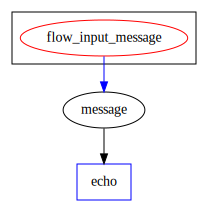

In [25]:
calc_flow.get_dot()